# Experiment 3- Linear Regression

### AIM- Predict housing price using univariate linear regression on kc_housing dataset

#### We make predictions using models in TensorFlow

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.__version__

'2.9.2'

In [ ]:
# Load the dataset as a dataframe named housing
housing = pd.read_csv('kc_house_data.csv')

# View price columns
print(housing['price'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [ ]:
size_log = np.log(np.array(housing['sqft_lot'], np.float32))
price_log = np.log(np.array(housing['price'], np.float32))
bedrooms = np.array(housing['bedrooms'], np.float32)

In [ ]:
# Define a linear regression model
def linear_regression(intercept, slope, features=size_log):
    return intercept + slope * features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features=size_log, targets=price_log):
    # Set the predicted values
    predictions = linear_regression(intercept, slope, features)

    # Return the mean squared error loss
    return tf.keras.losses.mse(targets, predictions)

# Compute the loss function for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

145.44653
71.866


#### Training Linear Model

In [ ]:
import matplotlib.pyplot as plt

def plot_results(intercept, slope):
    size_range = np.linspace(6,14,100)
    price_pred = [intercept + slope * s for s in size_range]
    plt.figure(figsize=(8, 8))
    plt.scatter(size_log, price_log, color = 'black');
    plt.plot(size_range, price_pred, linewidth=3.0, color='red');
    plt.xlabel('log(size)');
    plt.ylabel('log(price)');
    plt.title('Scatterplot of data and fitted regression line');

65.263725
1.4908673
2.3815567
2.9084811
2.611049
1.760517
1.3468053
1.3559624
1.288412
1.2425313


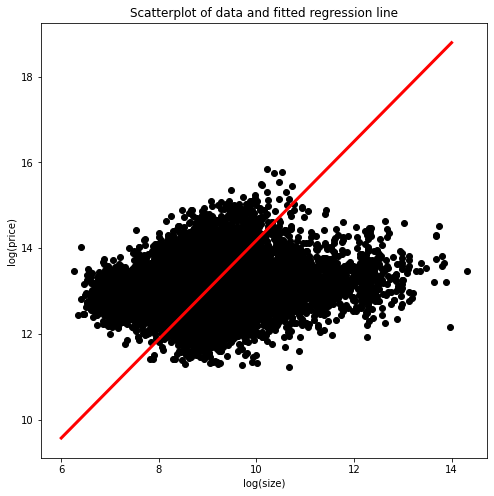

In [ ]:
intercept = tf.Variable(0.0, tf.float32)
slope = tf.Variable(0.0, tf.float32)

# Initialize an adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.5)

for j in range(100):
    # Apply minimize, pass the loss function, and supply the variables
    opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

    # Print every 10th value of the loss
    if j % 10 == 0:
        print(loss_function(intercept, slope).numpy())

# Plot data and regressoin line
plot_results(intercept, slope)

#### MUltiple Linear Regression

In [ ]:
def print_results(params):
    return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'
                 .format(loss_function(params).numpy(),
                         params[0].numpy(),
                         params[1].numpy(),
                         params[2].numpy()))

In [ ]:
params = tf.Variable([0.1, 0.05, 0.02], tf.float32)

# Define the linear regression model
def linear_regression(params, feature1=size_log, feature2=bedrooms):
    return params[0] + feature1 * params[1] + feature2 * params[2]

# Define the loss function
def loss_function(params, targets=price_log, feature1=size_log, feature2=bedrooms):
    # Set the predicted values
    predictions = linear_regression(params, feature1, feature2)

    # Use the mean absolute error loss
    return tf.keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = tf.keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
    opt.minimize(lambda: loss_function(params), var_list=[params])
    print_results(params)

loss: 12.418, intercept: 0.101, slope_1: 0.051, slope_2: 0.021
loss: 12.404, intercept: 0.102, slope_1: 0.052, slope_2: 0.022
loss: 12.391, intercept: 0.103, slope_1: 0.053, slope_2: 0.023
loss: 12.377, intercept: 0.104, slope_1: 0.054, slope_2: 0.024
loss: 12.364, intercept: 0.105, slope_1: 0.055, slope_2: 0.025
loss: 12.351, intercept: 0.106, slope_1: 0.056, slope_2: 0.026
loss: 12.337, intercept: 0.107, slope_1: 0.057, slope_2: 0.027
loss: 12.324, intercept: 0.108, slope_1: 0.058, slope_2: 0.028
loss: 12.311, intercept: 0.109, slope_1: 0.059, slope_2: 0.029
loss: 12.297, intercept: 0.110, slope_1: 0.060, slope_2: 0.030


#### Batch Training

In [ ]:
# preparing to batch train
# Define the intercept and slope
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
    # Define the predicted values
    return intercept + slope * features

# Define the loss function
def loss_function(intercept, slope, targets, features):
    # Define the predicted values
    predictions = linear_regression(intercept, slope, features)

    # Define the MSE loss
    return tf.keras.losses.mse(targets, predictions)

In [ ]:
# training a linear model in batches
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Initialize adam optimizer
opt = tf.keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
    size_batch = np.array(batch['sqft_lot'], np.float32)

    # Extract the price values for the current batch
    price_batch = np.array(batch['price'], np.float32)

    # Complete the loss, fill in the variable list, and minimize
    opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch),
                 var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016001
